In [2]:
import cv2 as cv
import numpy as np
import os

Tạo đường dẫn thư mục

In [3]:
my_path = 'D:/Nam2/HK2/TGMT/Do_an'

dir_train = my_path + '/train'
ltrain_angry = os.listdir(dir_train+'/angry')
ltrain_happy = os.listdir(dir_train+'/happy')
ltrain_sad = os.listdir(dir_train+'/sad')
ltrain = [ltrain_happy,ltrain_angry,ltrain_sad]

dir_test = my_path + '/test'
ltest_angry = os.listdir(dir_test+'/angry')
ltest_happy = os.listdir(dir_test+'/happy')
ltest_sad = os.listdir(dir_test+'/sad')
ltest = [ltest_happy,ltest_angry,ltest_sad]

Viết hàm trích xuất đặc trưng HOG

In [1]:

import cv2
from skimage import feature
import matplotlib.pyplot as plt

def compute_hog(image):
    
    # Chuyen ve anh xam
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize lai kich thuoc anh
    gray = cv2.resize(gray, (128, 128)) 

    # Thực hiện tính toán đặc trưng HOG
    hog, hog_image = feature.hog(gray, orientations=9,
                                 pixels_per_cell=(8, 8), 
                                 cells_per_block=(2, 2),
                                 block_norm='L2-Hys', 
                                 visualize=True, 
                                 transform_sqrt=True)
    return hog, hog_image



Ví dụ 

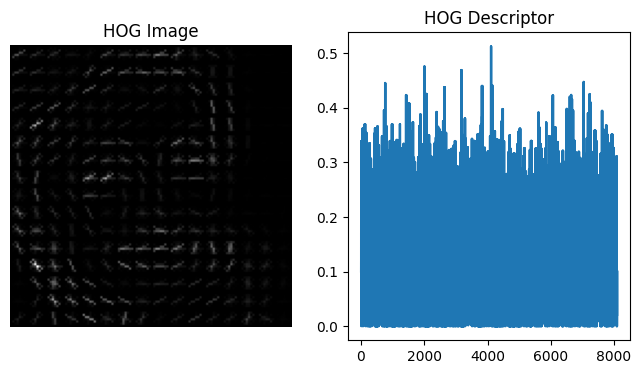

(8100,)
<class 'numpy.ndarray'>


In [4]:
# Đọc ảnh
img = cv2.imread('D:/Nam2/HK2/TGMT/Do_an/test/happy/PublicTest_60884527.jpg')

# Tính toán đặc trưng HOG và hình ảnh HOG cho ảnh
hog_features, hog_image = compute_hog(img)

# In ra đặc trưng HOG
#print("HOG features:", hog_features)

# Hiển thị hình ảnh HOG
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(hog_image, cmap=plt.cm.gray)
plt.title('HOG Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hog_features)
plt.title('HOG Descriptor')

plt.show()

print(hog_features.shape)
print(type(hog_features))


Tạo hàm detect khuôn mặt

In [4]:
def face_detect(img_path) :
    # Tạo đối tượng Classifier từ file xml
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    img = cv2.imread(img_path)
    # Chuyển đổi hình ảnh sang grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Nhận diện khuôn mặt
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        return None  # Trả về None nếu không có khuôn mặt nào được phát hiện

    for (x, y, w, h) in faces:
        face = img[y:y+h, x:x+w]  # Cắt khuôn mặt từ hình ảnh
        break
        
    return face

Ví dụ

In [5]:
my_img_path1 = 'D:/Nam2/HK2/TGMT/Do_an/test/002.png'
my_img_path = 'D:/Nam2/HK2/TGMT/Do_an/test/happy/PublicTest_60884527.jpg'
my_img_path2 = 'D:/Nam2/HK2/TGMT/Do_an/train/angry/Training_18270369.jpg'
face_img = face_detect(my_img_path)
cv2.imshow("img",face_img)
cv2.waitKey(0)  # Chờ cho đến khi người dùng nhấn một phím
cv2.destroyAllWindows()  # Đóng tất cả cửa sổ
print(face_img.shape)

(36, 36, 3)


Trích xuất features vector cho các tập dữ liệu

In [7]:
# trich xuat dac trung cho tap train_angry 
import os
train_features_angry = []
dir_train_angry = dir_train + '/angry'
for image_name in ltrain_angry: # Lap qua tung anh trong thu muc
  # Đường dẫn đầy đủ tới hình ảnh
  image_path = dir_train_angry + '/' + image_name
  img = cv2.imread(image_path)
  hog_feature,hog_img= compute_hog(img)
  # Chuyen vector dac truc thanh ma tran 1 chieu
  #feature_1d = np.concatenate(feature)
  # Them vao danh sach train_feature
  train_features_angry.append(hog_feature)
# In ra số lượng vector đặc trưng đã tính toán
print("Số lượng vector đặc trưng đã tính toán:", len(train_features_angry))

Số lượng vector đặc trưng đã tính toán: 333


In [8]:
print(train_features_angry[3])
print(type(train_features_angry[3]))
print(len(train_features_angry[3]))

[0.05424818 0.01096189 0.01305596 ... 0.02418443 0.         0.        ]
<class 'numpy.ndarray'>
8100


In [9]:
# trich xuat dac trung cho tap train_happy
import os
train_features_happy = []
dir_train_happy = dir_train + '/happy'
for image_name in ltrain_happy: # Lap qua tung anh trong thu muc
  # Đường dẫn đầy đủ tới hình ảnh
  image_path = dir_train_happy + '/' + image_name
  img = cv2.imread(image_path)
  hog_feature,hog_img= compute_hog(img)
  # Chuyen vector dac truc thanh ma tran 1 chieu
  #feature_1d = np.concatenate(feature)
  # Them vao danh sach train_feature
  train_features_happy.append(hog_feature) # !!!
# In ra số lượng vector đặc trưng đã tính toán
print("Số lượng vector đặc trưng đã tính toán:", len(train_features_happy))

Số lượng vector đặc trưng đã tính toán: 333


In [10]:
# trich xuat dac trung cho tap train_sad
import os
train_features_sad = []
dir_train_sad = dir_train + '/sad'
for image_name in ltrain_sad: # Lap qua tung anh trong thu muc
  # Đường dẫn đầy đủ tới hình ảnh
  image_path = dir_train_sad + '/' + image_name
  img = cv2.imread(image_path)
  hog_feature,hog_img= compute_hog(img)
  # Chuyen vector dac truc thanh ma tran 1 chieu
  #feature_1d = np.concatenate(feature)
  # Them vao danh sach train_feature
  train_features_sad.append(hog_feature) 
# In ra số lượng vector đặc trưng đã tính toán
print("Số lượng vector đặc trưng đã tính toán:", len(train_features_sad))

Số lượng vector đặc trưng đã tính toán: 333


In [11]:
# trich xuat dac trung cho tap test_angry
import os
test_features_angry = []
dir_test_angry = dir_test + '/angry'
for image_name in ltest_angry: # Lap qua tung anh trong thu muc
  # Đường dẫn đầy đủ tới hình ảnh
  image_path = dir_test_angry + '/' + image_name
  img = cv2.imread(image_path)
  hog_feature,hog_img= compute_hog(img)
  # Chuyen vector dac truc thanh ma tran 1 chieu
  #feature_1d = np.concatenate(feature)
  # Them vao danh sach train_feature
  test_features_angry.append(hog_feature) 
# In ra số lượng vector đặc trưng đã tính toán
print("Số lượng vector đặc trưng đã tính toán:", len(test_features_angry))

Số lượng vector đặc trưng đã tính toán: 100


In [12]:
# trich xuat dac trung cho tap test_happy
import os
test_features_happy = []
dir_test_happy = dir_test + '/happy'
for image_name in ltest_happy: # Lap qua tung anh trong thu muc
  # Đường dẫn đầy đủ tới hình ảnh
  image_path = dir_test_happy + '/' + image_name
  img = cv2.imread(image_path)
  hog_feature,hog_img= compute_hog(img)
  # Chuyen vector dac truc thanh ma tran 1 chieu
  #feature_1d = np.concatenate(feature)
  # Them vao danh sach train_feature
  test_features_happy.append(hog_feature) 
# In ra số lượng vector đặc trưng đã tính toán
print("Số lượng vector đặc trưng đã tính toán:", len(test_features_happy))

Số lượng vector đặc trưng đã tính toán: 100


In [13]:
# trich xuat dac trung cho tap test_sad
import os
test_features_sad = []
dir_test_sad = dir_test + '/sad'
for image_name in ltest_sad: # Lap qua tung anh trong thu muc
  # Đường dẫn đầy đủ tới hình ảnh
  image_path = dir_test_sad + '/' + image_name
  img = cv2.imread(image_path)
  hog_feature,hog_img= compute_hog(img)
  # Chuyen vector dac truc thanh ma tran 1 chieu
  #feature_1d = np.concatenate(feature)
  # Them vao danh sach train_feature
  test_features_sad.append(hog_feature) 
# In ra số lượng vector đặc trưng đã tính toán
print("Số lượng vector đặc trưng đã tính toán:", len(test_features_sad))

Số lượng vector đặc trưng đã tính toán: 100


In [14]:
# noi cac bo du lieu sau khi da tinh toan
x_test = test_features_angry + test_features_happy + test_features_sad
print(len(x_test))
x_train = train_features_angry + train_features_happy + train_features_sad
print(len(x_train))

300
999


In [15]:
# Tao cac tap y_train,y_test
a = [0]*333
h = [1]*333
s = [2]*333
y_train = a + h + s

A = [0]*100
H = [1]*100
S = [2]*100
y_test = A + H + S

Huấn luyện mô hình

KNN

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

# Huan luyen mo hinh su dung K-nearest neighbors 
knn = neighbors.KNeighborsClassifier(n_neighbors =13, p = 1,weights = 'distance')
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [17]:
# Kiem tra ket qua
from sklearn.metrics import accuracy_score

print ("Print results for 20 test data points:")
print ("Predicted labels: ", y_pred_knn[110:120])
print ("Ground truth    : ", y_test[110:120])

print ("Accuracy of 10NN: %.2f %%" %(100*accuracy_score(y_test, y_pred_knn)))

Print results for 20 test data points:
Predicted labels:  [1 1 1 1 1 1 1 1 1 0]
Ground truth    :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy of 10NN: 52.00 %


In [18]:
from sklearn.metrics import accuracy_score, classification_report
print("KNN Classification report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification report:
              precision    recall  f1-score   support

           0       0.60      0.43      0.50       100
           1       0.46      0.87      0.60       100
           2       0.68      0.26      0.38       100

    accuracy                           0.52       300
   macro avg       0.58      0.52      0.49       300
weighted avg       0.58      0.52      0.49       300



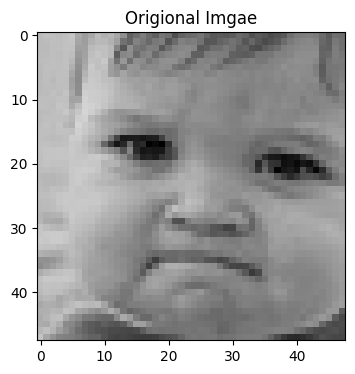

Nhan du doan :  sad


In [19]:

def demo(img_path):
    img = cv2.imread(img_path)
    hog_features,hog_image=compute_hog(img)
    prediction = knn.predict([hog_features])
    if prediction == 0:
        label = 'angry'
    elif prediction == 1 :
        label = 'happy'
    else :
        label = 'sad'
    # Hiển thị hình ảnh HOG
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 1, 1)
    plt.imshow(img)
    plt.title('Origional Imgae')
    plt.show()
    return label

img_path = 'D:/Nam2/HK2/TGMT/Do_an/test/angry/PublicTest_9139860.jpg'

prediction=demo(img_path)

print("Nhan du doan : ", prediction)

Dùng vét cạn tìm bộ tham số tốt nhất cho mô hình

In [20]:
# Tạo các tập giá trị để thử nghiệm
K_list = range(1, 51)
p_list = [1, 2]
weights_list = ['uniform', 'distance']

# Biến để lưu trữ giá trị tốt nhất
best_k = None
best_p = None
best_weights = None
best_accuracy = 0

# Dùng vét cạn để thử tất cả các kết hợp
for k in K_list:
    for p in p_list:
        for weights in weights_list:
            knn = neighbors.KNeighborsClassifier(n_neighbors=k, p=p, weights=weights)
            knn.fit(x_train, y_train)
            y_pred_knn = knn.predict(x_test)
            accuracy = accuracy_score(y_test, y_pred_knn)
            
            # In độ chính xác cho từng kết hợp
            print(f'k = {k}, p = {p}, weights = {weights}, accuracy = {accuracy * 100:.2f}%')
            
            if accuracy > best_accuracy:
                best_k = k
                best_p = p
                best_weights = weights
                best_accuracy = accuracy

# In kết quả tốt nhất
print(f'\nGiá trị tốt nhất: k = {best_k}, p = {best_p}, weights = {best_weights}')
print(f'Độ chính xác cao nhất: {best_accuracy * 100:.2f}%')

k = 1, p = 1, weights = uniform, accuracy = 48.33%
k = 1, p = 1, weights = distance, accuracy = 48.33%
k = 1, p = 2, weights = uniform, accuracy = 41.33%
k = 1, p = 2, weights = distance, accuracy = 41.33%
k = 2, p = 1, weights = uniform, accuracy = 45.33%
k = 2, p = 1, weights = distance, accuracy = 48.33%
k = 2, p = 2, weights = uniform, accuracy = 41.67%
k = 2, p = 2, weights = distance, accuracy = 41.33%
k = 3, p = 1, weights = uniform, accuracy = 50.33%
k = 3, p = 1, weights = distance, accuracy = 47.67%
k = 3, p = 2, weights = uniform, accuracy = 46.33%
k = 3, p = 2, weights = distance, accuracy = 43.00%
k = 4, p = 1, weights = uniform, accuracy = 48.00%
k = 4, p = 1, weights = distance, accuracy = 48.00%
k = 4, p = 2, weights = uniform, accuracy = 47.33%
k = 4, p = 2, weights = distance, accuracy = 48.00%
k = 5, p = 1, weights = uniform, accuracy = 49.67%
k = 5, p = 1, weights = distance, accuracy = 50.33%
k = 5, p = 2, weights = uniform, accuracy = 43.67%
k = 5, p = 2, weights 

SVM

In [21]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from scipy.stats import expon

# Giảm số lượng đặc trưng với PCA
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Tạo một lưới tham số cho RandomizedSearchCV với không gian nhỏ hơn
param_dist = {
    'C': expon(scale=10),  # Giảm phạm vi tìm kiếm cho C
    'kernel': ['linear', 'rbf'],  # Giảm số lượng kernel
    'gamma': ['scale', 'auto']
}

# Sử dụng RandomizedSearchCV để tìm tham số tốt nhất
svm_model = SVC()
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=100, n_jobs=-1)
random_search.fit(x_train_pca, y_train)

# In tham số tốt nhất
print("Best parameters found:", random_search.best_params_)

Best parameters found: {'C': 3.4647522255979775, 'gamma': 'auto', 'kernel': 'rbf'}


Thay thế các tham số tối ưu sau khi dùng Random Search vào mô hình SVM

In [22]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Tạo và huấn luyện mô hình SVM
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
svm_model = SVC(C = 1.3015223395444864, gamma = 'scale', kernel = 'rbf')
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

Tìm tham số truyền vào tốt nhất bằng phương pháp Random Search

In [23]:
from sklearn.metrics import accuracy_score

y_pred_svm = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 52.33%


In [24]:
from sklearn.metrics import accuracy_score, classification_report
print("SVM Classification report:")
print(classification_report(y_test, y_pred_svm))
y_pred_svm = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy * 100:.2f}%")

SVM Classification report:
              precision    recall  f1-score   support

           0       0.45      0.42      0.43       100
           1       0.65      0.62      0.64       100
           2       0.48      0.53      0.50       100

    accuracy                           0.52       300
   macro avg       0.53      0.52      0.52       300
weighted avg       0.53      0.52      0.52       300

Accuracy: 52.33%


Demo KNN + SVM

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Demo se truyen 1 anh vao va xuat ra bieu cam khuon mat cua anh do 

def demo_predict_emotion (img_path):
    img = Image.open(img_path)
    face_img = face_detect(img_path)
    hog_feature,hog_img = compute_hog(face_img)
    face_image_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))

    # Hien thi anh goc
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Origional Imgae')

    # Hien thi anh khuon mat da duoc detect
    plt.subplot(1, 3, 2)
    plt.imshow(face_image_rgb)
    plt.title('Detected Face')
    # Hiển thị hình ảnh HOG
    
    plt.subplot(1, 3, 3)
    plt.imshow(hog_img, cmap=plt.cm.gray)
    plt.title('HOG Image')
    


    plt.show()

    
    prediction_knn = knn.predict([hog_feature])
    if prediction_knn == 0:
        label_knn = 'angry'
    elif prediction_knn == 1 :
        label_knn = 'happy'
    else :
        label_knn = 'sad'
    print("Nhan du doan KNN: ", label_knn)

    prediction_svm = svm_model.predict([hog_feature])
    if prediction_svm == 0:
        label_svm = 'angry'
    elif prediction_svm == 1 :
        label_svm = 'happy'
    else :
        label_svm = 'sad'
    print("Nhan du doan SVM: ", label_svm)


Demo du doan 1 so hinh anh tren google

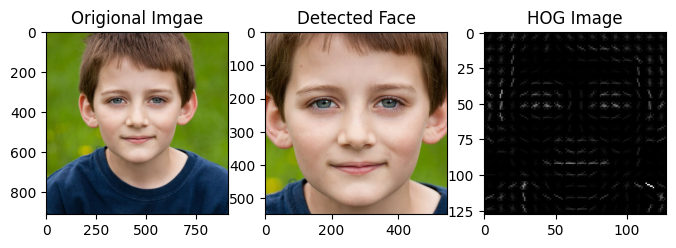

Nhan du doan KNN:  happy
Nhan du doan SVM:  happy


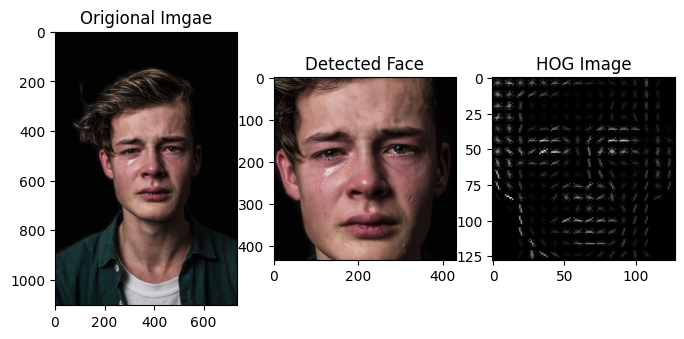

Nhan du doan KNN:  angry
Nhan du doan SVM:  sad


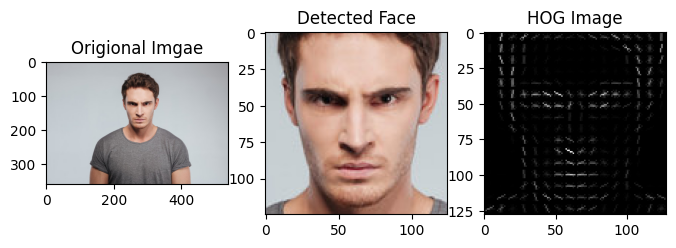

Nhan du doan KNN:  angry
Nhan du doan SVM:  angry


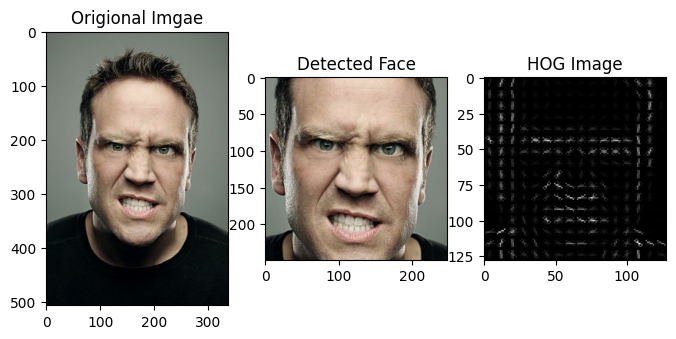

Nhan du doan KNN:  angry
Nhan du doan SVM:  angry


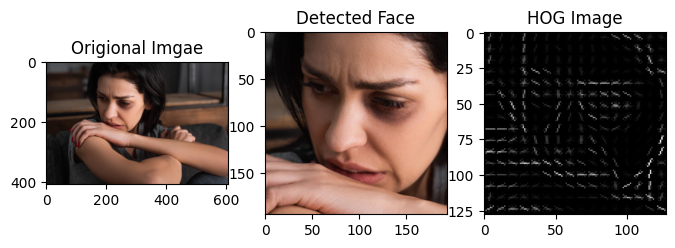

Nhan du doan KNN:  sad
Nhan du doan SVM:  sad


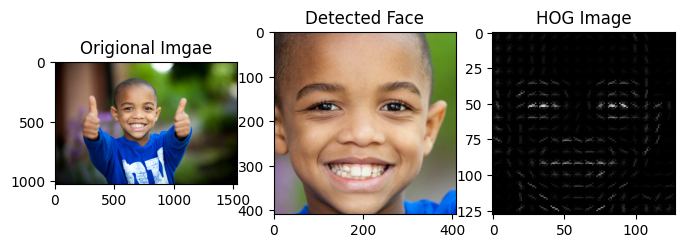

Nhan du doan KNN:  happy
Nhan du doan SVM:  happy


In [30]:
dir_demo = my_path + '/demo'
list_demo = os.listdir(dir_demo)

for image_name in list_demo: # Lap qua tung anh trong thu muc
  # Đường dẫn đầy đủ tới hình ảnh
  image_path = dir_demo + '/' + image_name
  demo_predict_emotion(image_path)
  

Demo du doan trong tap dataset

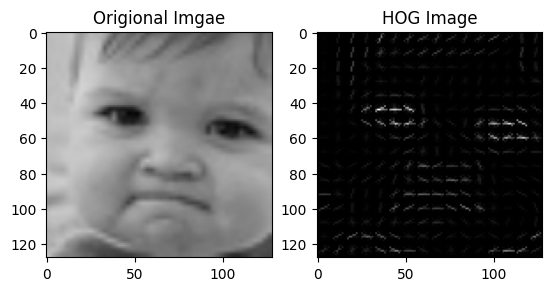

Nhan du doan KNN:  sad
Nhan du doan SVM:  sad


In [27]:

def demo(img_path):
    img = cv2.imread(img_path)
    hog_feature,hog_image=compute_hog(img)
    # Hien thi anh goc
    plt.subplot(1, 2, 1)
    img_resized = cv2.resize(img, (128, 128)) 
    plt.imshow(img_resized)
    plt.title('Origional Imgae')

    
    # Hiển thị hình ảnh HOG
    
    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap=plt.cm.gray)
    plt.title('HOG Image')
    


    plt.show()

    
    prediction_knn = knn.predict([hog_feature])
    if prediction_knn == 0:
        label_knn = 'angry'
    elif prediction_knn == 1 :
        label_knn = 'happy'
    else :
        label_knn = 'sad'
    print("Nhan du doan KNN: ", label_knn)

    prediction_svm = svm_model.predict([hog_feature])
    if prediction_svm == 0:
        label_svm = 'angry'
    elif prediction_svm == 1 :
        label_svm = 'happy'
    else :
        label_svm = 'sad'
    print("Nhan du doan SVM: ", label_svm)


img_path = 'D:/Nam2/HK2/TGMT/Do_an/test/angry/PublicTest_9139860.jpg'
demo(img_path)


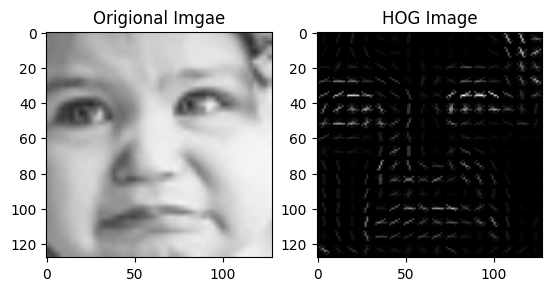

Nhan du doan KNN:  happy
Nhan du doan SVM:  sad


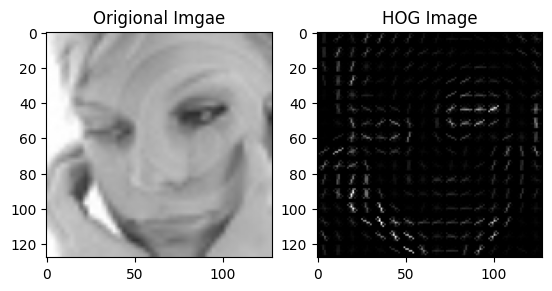

Nhan du doan KNN:  happy
Nhan du doan SVM:  sad


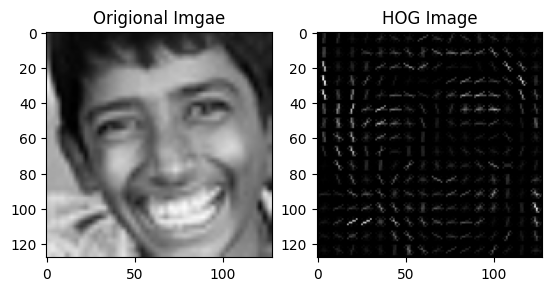

Nhan du doan KNN:  happy
Nhan du doan SVM:  happy


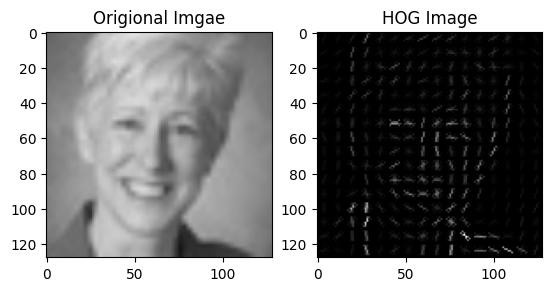

Nhan du doan KNN:  happy
Nhan du doan SVM:  sad


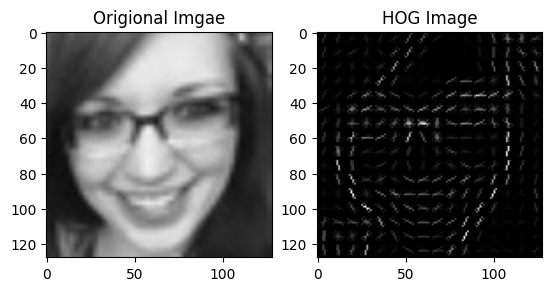

Nhan du doan KNN:  happy
Nhan du doan SVM:  happy


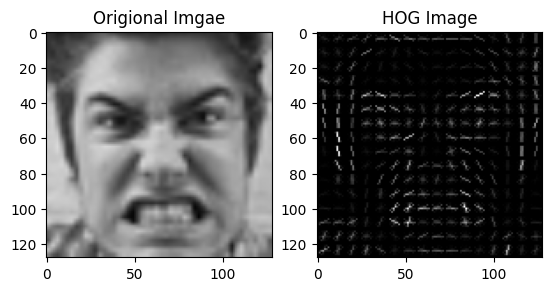

Nhan du doan KNN:  angry
Nhan du doan SVM:  angry


In [31]:
dir_demo_in_dataset = my_path + '/test/demo'
list_demo = os.listdir(dir_demo_in_dataset)

for image_name in list_demo: # Lap qua tung anh trong thu muc
  # Đường dẫn đầy đủ tới hình ảnh
  image_path = dir_demo_in_dataset + '/' + image_name
  demo(image_path)